# Preprocessing

***
## DATA
__Source__ : MACHO VS multiband photometry [red and blue bands] (Alcock et al., 1996)

<br>


In [1]:
%run ../setup_notebook

Using TensorFlow backend.


## [1]Load metadata

In [2]:
data_dir = os.path.dirname(os.getcwd())+'/../example_data/MACHO/preprocessed_data/'

meta_dir = data_dir+'MACHO_metadata.xlsx'
metadata = pd.read_excel(meta_dir, 
                         sheet_name='full_metadata',  
                         index_col=0)

nobj = len(metadata)

metadata

,names_lc,Y_label,starid,rarad,decrad,field,tile,seqn,magave_r,magave_b,...,suprsa_b,chi2r_r,chi2r_b,sig_r,sig_b,varindex,period_,epochs_t0,lenghts_red,lenghts_blue
0,1.3319.10,LPV_WoodB,44207137,1.31447,-1.21183,1,3319,10,-9.731,-8.373,...,3.75,13.12,20.86,0.073,0.100,2.411,88.744771,49171.7516,613,1153
1,1.3441.15,Cepheid_Fund,44210178,1.31714,-1.21107,1,3441,15,-9.863,-9.644,...,0.82,91.85,187.10,0.187,0.284,9.649,10.413375,49682.5187,725,1233
2,1.3441.25,LPV_WoodB,44210188,1.31518,-1.21116,1,3441,25,-8.982,-7.538,...,6.11,31.63,50.17,0.116,0.179,2.206,89.656744,50061.5484,676,1196
3,1.3441.45,Cepheid_Fund,44210208,1.31567,-1.21106,1,3441,45,-8.420,-8.226,...,0.57,63.30,120.70,0.155,0.240,3.674,3.362243,50736.5331,707,1227
4,1.3441.1031,RR_Lyrae_AB,44211194,1.31526,-1.21067,1,3441,1031,-4.748,-4.678,...,0.80,6.02,13.32,0.312,0.516,0.341,0.507257,49727.4892,619,717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17599,82.9138.890,RR_Lyrae_C,835958,1.46818,-1.19968,82,9138,890,-4.003,-4.005,...,1.59,2.78,4.22,0.202,0.278,0.126,0.300285,50234.4118,403,901
17600,82.9249.21,LPV_WoodD,833865,1.47033,-1.21074,82,9249,21,-7.797,-6.476,...,1.28,65.20,7.65,0.176,0.197,0.608,439.443478,50181.5185,899,933
17601,82.9250.16,Eclipsing_Binary,833236,1.47063,-1.21031,82,9250,16,-7.323,-7.727,...,0.82,22.36,26.95,0.092,0.096,1.173,0.981513,49043.5901,884,928
17602,82.9250.191,RR_Lyrae_AB,833091,1.47082,-1.20950,82,9250,191,-4.313,-4.265,...,0.95,4.34,7.03,0.255,0.315,0.223,0.563258,50353.5323,861,915


In [3]:
metadata.columns

Index(['names_lc', 'Y_label', 'starid', 'rarad', 'decrad', 'field', 'tile',
       'seqn', 'magave_r', 'magave_b', 'magave_bminusr', 'magave_kv',
       'magave_kr', 'magave_kvminuskr', 'amp_r', 'amp_b', 'amp_bminusr',
       'amp_reqb', 'suprsa_r', 'suprsa_b', 'chi2r_r', 'chi2r_b', 'sig_r',
       'sig_b', 'varindex', 'period_', 'epochs_t0', 'lenghts_red',
       'lenghts_blue'],
      dtype='object')

## [2] Load stored time-series

In [4]:
store_dir = data_dir +'pkl_fileformat/timeseries/initial_lengths/'
lcs_blue = joblib.load(store_dir+'listLC_times_blue.pkl')
lcs_red  = joblib.load(store_dir+'listLC_times_red.pkl')

### &emsp;&emsp;&emsp; [2.1] Phase-folded light-curves

In [5]:
lcs_blue_fold = copy.deepcopy(lcs_blue)
lcs_red_fold  = copy.deepcopy(lcs_red)

for i in range(nobj):
    m_period  = metadata['period_']  [i]
    m_epocht0 = metadata['epochs_t0'][i]
    
    lcs_blue_fold[i].period_fold(period   = m_period, 
                                 epoch_t0 = m_epocht0,
                                 #extend_2cycles = True,  ## by default
                                 )
    ## similar to : 
    lcs_red_fold[i] = m_preprocess. period_fold(lcs_red_fold[i],
                                                period   = m_period, 
                                                epoch_t0 = m_epocht0,
                                                #extend_2cycles = True,  ## by default
                                                )
    lcs_blue_fold[i].cut=None; lcs_blue_fold[i].ss_resid=None; lcs_blue_fold[i].nb_points=None; 
    lcs_red_fold[i].cut =None; lcs_red_fold[i].ss_resid=None;  lcs_red_fold[i].nb_points=None; 
    
    

### &emsp;&emsp;&emsp; [2.2] Displays

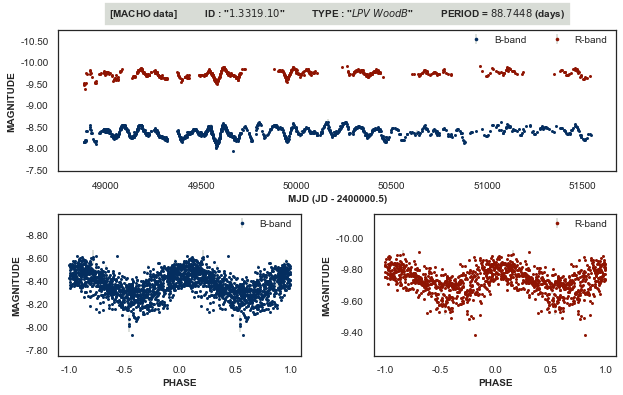

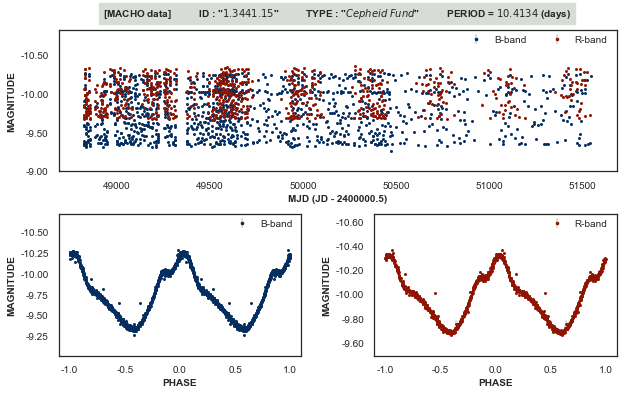

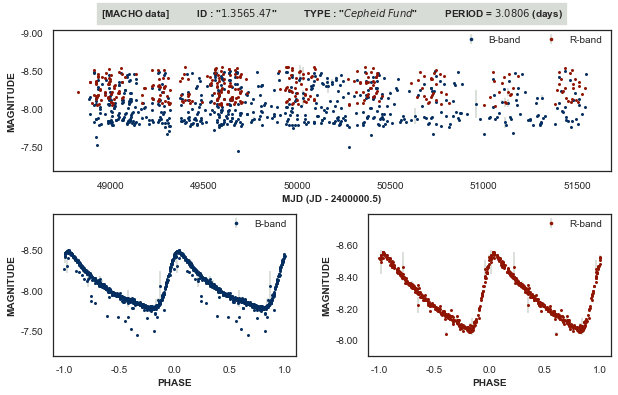

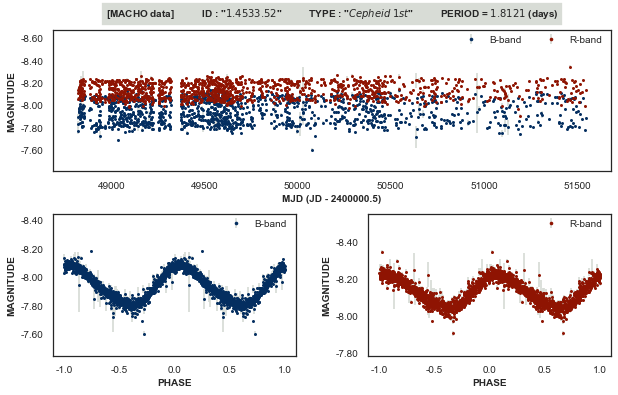

In [13]:
mr='.'; ms=6
j=0; nli=2; ncol=2

plt.close('all')
for idlc in [0, 1, 65, 531]:
    lc_b      = lcs_blue      [idlc]
    lc_r      = lcs_red       [idlc]
    lc_b_fold = lcs_blue_fold [idlc]
    lc_r_fold = lcs_red_fold  [idlc]

    
    ## ##################### LIGHT_CURVES ##################### ##
    j+=1; plt.figure(num=j+1, figsize=(m_width, m_height*nli))
    plt.subplots_adjust(wspace=.3, hspace=.3)
    
    G=gridspec.GridSpec(nli,ncol)  
    ax1 = plt.subplot(G[0,:2])
    plt.errorbar(lc_b.times,
                 lc_b.measurements, 
                 lc_b.errors, 
                 None, mr,
                 color=color_blue, 
                 ecolor=color_gray,
                 markersize=ms, label='B-band')
    plt.errorbar(lc_r.times,
                 lc_r.measurements, 
                 lc_r.errors, 
                 None, mr,
                 color=color_red, 
                 ecolor=color_gray,
                 markersize=ms, label='R-band')
    plt.gca().invert_yaxis()
    ymin,ymax = plt.gca().get_ylim(); vari=(ymax-ymin)/3; plt.ylim(ymin-vari/2,ymax+vari)
    yticklabels = [l for l in plt.gca().get_yticks() if l is not '']
    plt.gca().set_yticklabels(["%.2f" % member for member in yticklabels])    
    plt.gca().tick_params(labelsize=m_size, pad=10)
    plt.xlabel('MJD (JD - 2400000.5)', fontsize=m_size, fontweight='bold')
    plt.ylabel('MAGNITUDE', fontsize=m_size, fontweight='bold')
    plt.legend(ncol=2, loc='upper right', shadow=False, frameon=False, 
               bbox_to_anchor=(1,1.025), fontsize=m_size, markerscale=1.2)
    
    
    emp = ' '*10; m_period = metadata['period_'][idlc]
    nm = metadata['names_lc'][idlc]; lb = metadata['Y_label'][idlc].replace('_','\;')
    mtitre = f'[MACHO data]{emp}ID : "${nm}$"{emp}TYPE : "${lb}$"{emp}PERIOD = ${mformat_f4%m_period}$ (days)'
    plt.title(mtitre, fontsize=m_size, fontweight='bold', backgroundcolor=color_gray, position=(0.5, 1.05))



        
    ## ##################### PHASE-FOLDED LIGHT_CURVES ##################### ##
    ax2 = plt.subplot(G[1,0])
    plt.errorbar(lc_b_fold.times,
                 lc_b_fold.measurements, 
                 lc_b_fold.errors, 
                 None, mr,
                 color=color_blue, 
                 ecolor=color_gray,
                 markersize=ms, label='B-band')
    plt.gca().invert_yaxis()
    ymin,ymax = plt.gca().get_ylim(); vari=(ymax-ymin)/3; plt.ylim(ymin-vari/2,ymax+vari)
    yticklabels = [l for l in plt.gca().get_yticks() if l is not '']
    plt.gca().set_yticklabels(["%.2f" % member for member in yticklabels])    
    plt.gca().tick_params(labelsize=m_size, pad=10)
    plt.xlabel('PHASE', fontsize=m_size, fontweight='bold')
    plt.ylabel('MAGNITUDE', fontsize=m_size, fontweight='bold')
    plt.legend(ncol=2, loc='upper right', shadow=False, frameon=False, 
               bbox_to_anchor=(1,1.025), fontsize=m_size, markerscale=1.2)
    
    
    ax3 = plt.subplot(G[1,1])
    plt.errorbar(lc_r_fold.times,
                 lc_r_fold.measurements, 
                 lc_r_fold.errors, 
                 None, mr,
                 color=color_red, 
                 ecolor=color_gray,
                 markersize=ms, label='R-band')
    plt.gca().invert_yaxis()
    ymin,ymax = plt.gca().get_ylim(); vari=(ymax-ymin)/3; plt.ylim(ymin-vari/2,ymax+vari)
    yticklabels = [l for l in plt.gca().get_yticks() if l is not '']
    plt.gca().set_yticklabels(["%.2f" % member for member in yticklabels])    
    plt.gca().tick_params(labelsize=m_size, pad=10)
    plt.xlabel('PHASE', fontsize=m_size, fontweight='bold')
    plt.ylabel('MAGNITUDE', fontsize=m_size, fontweight='bold')
    plt.legend(ncol=2, loc='upper right', shadow=False, frameon=False, 
               bbox_to_anchor=(1,1.025), fontsize=m_size, markerscale=1.2)
    



## [3] Data reduction with GP fit & prediction

The process is performed for each object, (parallel jobs or for loop)

In [7]:
idlc      = 65#531  ## range(nobj)

lc_b      = lcs_blue      [idlc]
lc_r      = lcs_red       [idlc]
lc_b_fold = lcs_blue_fold [idlc]
lc_r_fold = lcs_red_fold  [idlc]

m_epocht0 = metadata['epochs_t0'] [idlc]
m_period  = metadata['period_']   [idlc]

nbpoints_up=200


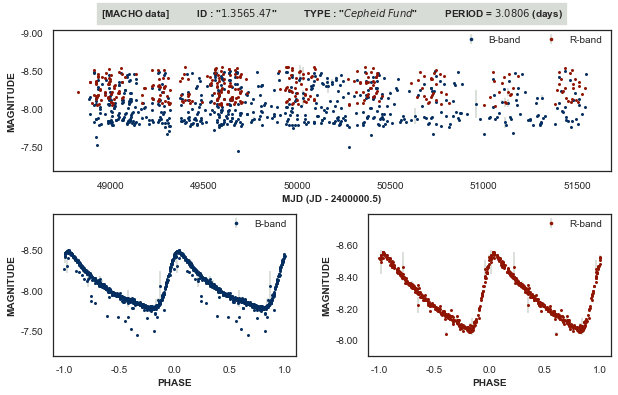

In [8]:
mr='.'; ms=6
j=0; nli=2; ncol=2

plt.close('all')

## --------------------------------------------------------------------------------------------- ##
## --------------------------------------------------------------------------------------------- ##
## ------------------------ OBSERVED LIGHT_CURVES (R- & B- bands, MACHO) ----------------------- ##
## --------------------------------------------------------------------------------------------- ##
## --------------------------------------------------------------------------------------------- ##
j+=1; plt.figure(num=j+1, figsize=(m_width, m_height*nli))
plt.subplots_adjust(wspace=.3, hspace=.3)
G=gridspec.GridSpec(nli,ncol) 

ax0 = plt.subplot(G[0,:2])
plt.errorbar(lc_b.times,
             lc_b.measurements, 
             lc_b.errors, 
             None, mr,
             color=color_blue, 
             ecolor=color_gray,
             markersize=ms, label='B-band')
plt.errorbar(lc_r.times,
             lc_r.measurements, 
             lc_r.errors, 
             None, mr,
             color=color_red, 
             ecolor=color_gray,
             markersize=ms, label='R-band')
plt.gca().invert_yaxis()
ymin,ymax = plt.gca().get_ylim(); vari=(ymax-ymin)/3; plt.ylim(ymin-vari/2,ymax+vari)
yticklabels = [l for l in plt.gca().get_yticks() if l is not '']
plt.gca().set_yticklabels(["%.2f" % member for member in yticklabels])    
plt.gca().tick_params(labelsize=m_size, pad=10)
plt.xlabel('MJD (JD - 2400000.5)', fontsize=m_size, fontweight='bold')
plt.ylabel('MAGNITUDE', fontsize=m_size, fontweight='bold')
plt.legend(ncol=2, loc='upper right', shadow=False, frameon=False, 
           bbox_to_anchor=(1,1.025), fontsize=m_size, markerscale=1.2)

emp = ' '*10; m_period = metadata['period_'][idlc]
nm = metadata['names_lc'][idlc]; lb = metadata['Y_label'][idlc].replace('_','\;')
mtitre = f'[MACHO data]{emp}ID : "${nm}$"{emp}TYPE : "${lb}$"{emp}PERIOD = ${mformat_f4%m_period}$ (days)'
plt.title(mtitre, fontsize=m_size, fontweight='bold', backgroundcolor=color_gray, position=(0.5, 1.05))

## ##################### PHASE-FOLDED LIGHT_CURVES ##################### ##
ax2 = plt.subplot(G[1,0])
plt.errorbar(lc_b_fold.times,
             lc_b_fold.measurements, 
             lc_b_fold.errors, 
             None, mr,
             color=color_blue, 
             ecolor=color_gray,
             markersize=ms, label='B-band')
plt.gca().invert_yaxis()
ymin,ymax = plt.gca().get_ylim(); vari=(ymax-ymin)/3; plt.ylim(ymin-vari/2,ymax+vari)
yticklabels = [l for l in plt.gca().get_yticks() if l is not '']
plt.gca().set_yticklabels(["%.2f" % member for member in yticklabels])    
plt.gca().tick_params(labelsize=m_size, pad=10)
plt.xlabel('PHASE', fontsize=m_size, fontweight='bold')
plt.ylabel('MAGNITUDE', fontsize=m_size, fontweight='bold')
plt.legend(ncol=2, loc='upper right', shadow=False, frameon=False, 
           bbox_to_anchor=(1,1.025), fontsize=m_size, markerscale=1.2)
## ------------------------------ ##
ax3 = plt.subplot(G[1,1])
plt.errorbar(lc_r_fold.times,
             lc_r_fold.measurements, 
             lc_r_fold.errors, 
             None, mr,
             color=color_red, 
             ecolor=color_gray,
             markersize=ms, label='R-band')
plt.gca().invert_yaxis()
ymin,ymax = plt.gca().get_ylim(); vari=(ymax-ymin)/3; plt.ylim(ymin-vari/2,ymax+vari)
yticklabels = [l for l in plt.gca().get_yticks() if l is not '']
plt.gca().set_yticklabels(["%.2f" % member for member in yticklabels])    
plt.gca().tick_params(labelsize=m_size, pad=10)
plt.xlabel('PHASE', fontsize=m_size, fontweight='bold')
plt.ylabel('MAGNITUDE', fontsize=m_size, fontweight='bold')
plt.legend(ncol=2, loc='upper right', shadow=False, frameon=False, 
           bbox_to_anchor=(1,1.025), fontsize=m_size, markerscale=1.2)


### &emsp;&emsp;&emsp; [3.1] Generate the reduced time-frame

In [9]:
## Shift in times (days) injected to randomly-selected valued in T_obs
##   for j : 1 to nSubsets detected between identified large gaps within T_observed
##       if TRUE:          delta = MIN(dT[j]) / factor 
##       else:             delta = MIN(dT[j]) / random.randint(5,100)
## with dT[j] the times-differences within the detected subset j
## T_obs refers to sparsly observed data (unevenly-space time-series)

delta_fix = False   ## False


## ################################ Bband data ################################ ##
x  = copy.deepcopy(lc_b.times)
dx = np.r_[0, np.diff(lc_b.times)]
dict_gen_times, _, _, _ = m_preprocess.get_random_timerange(x,
                                                            dx,nbpoints_up,
                                                            period_crit=3*m_period,
                                                            fixed_shift=delta_fix
                                                           )

x_up2_b = dict_gen_times['rand_selshift']; #x_up1_b = dict_gen_times['rand_gen']; 
del dict_gen_times

## ################################ Rband data ################################ ##
x  = copy.deepcopy(lc_r.times)
dx = np.r_[0, np.diff(lc_r.times)]
dict_gen_times, _, _, _ = m_preprocess.get_random_timerange(x,
                                                            dx,nbpoints_up,
                                                            period_crit=3*m_period,
                                                            fixed_shift=delta_fix
                                                           )

x_up2_r = dict_gen_times['rand_selshift'] ; #x_up1_r = dict_gen_times['rand_gen']; 
del dict_gen_times

In [10]:
#dict_gen_times, dict_identified_gaps, dict_identified_subsets, dict_km_clusters = m_preprocess.get_random_timerange(x,dx,nbpoints_up,period_crit=3*m_period)    
#obs_subsets_times = dict_identified_subsets['obs_subsets_times']
#obs_subsets_idx   = dict_identified_subsets['obs_subsets_idx']
#gaps_start_idx    = dict_identified_gaps['gaps_start_idx']
#gaps_end_idx      = dict_identified_gaps['gaps_end_idx']
#gaps_start_time   = dict_identified_gaps['gaps_start_time']
#gaps_end_time     = dict_identified_gaps['gaps_end_time']
#gaps_diff_time    = dict_identified_gaps['gaps_diff_time']
#ngaps             = dict_identified_gaps['ngaps']
#len_subsets       = [len(obs_subsets_times[f'set{xx}']) for xx in range(ngaps+1)]
#len_subsets_total = np.sum(len_subsets) #len(x)


### &emsp;&emsp;&emsp; [3.2] GP fit & model predictions

GP modelling using the ___celerite___ py package embedded in the py project ___exoplanet___.

__References__
- ___exoplanet___ py package (Foreman-Mackey et al. 2019) and its dependencies: 
    ___celerite___ (Foreman-Mackey et al. 2017; Foreman- Mackey 2018), 
    ___pymc3___ (Salvatier et al. 2016) 
    and ___theano___ (Theano Development Team 2016).


__Note__ : GP modelling can be performed directly using the ___celerite___ or ___George___ py packages, among other py open-source packages.


In [11]:
alpha   = 1 #5
m_variation =  1e-20  
pix_rej = True 
kernel_type='mix_SHOs' 

## ################################ Bband data ################################ ##
#%time dict_gpm_b_1, dict_map_gp_b_1, dict_pred_gp_b_1 = m_preprocess.pred_GP_lc(lc_b.times,\
print('\n>> GP PRED (Bband) \t kernel type:mixSHOs \t time-range:MIX_TIME_SHIFTED')
%time _, _, dict_pred_gp_b_2 = m_preprocess.pred_GP_lc(lc_b.times,\
                                                       lc_b.measurements,\
                                                       lc_b.errors,\
                                                       mperiod=m_period,\
                                                       x_up=x_up2_b,\
                                                       pix_rejection=pix_rej,\
                                                       alpha=alpha,\
                                                       m_variation=m_variation,\
                                                       kernel_type=kernel_type,\
                                                       lc_phased=False,\
                                                       lc_normalized=False,\
                                                       verbose=False) 


## ################################ Rband data ################################ ##
print('\n>> GP PRED (Rband) \t kernel type:mixSHOs \t time-range:MIX_TIME_SHIFTED')
%time _, _, dict_pred_gp_r_2 = m_preprocess.pred_GP_lc(lc_r.times,\
                                                       lc_r.measurements,\
                                                       lc_r.errors,\
                                                       mperiod=m_period,\
                                                       x_up=x_up2_r,\
                                                       pix_rejection=pix_rej,\
                                                       alpha=alpha,\
                                                       m_variation=m_variation,\
                                                       kernel_type=kernel_type,\
                                                       lc_phased=False,\
                                                       lc_normalized=False,\
                                                       verbose=False) 



## ------------------------------------------------------------- ##
lc_b_GP_2              = copy.deepcopy(lc_b);  
lc_b_GP_2.times        = dict_pred_gp_b_2['x_up']
lc_b_GP_2.measurements = dict_pred_gp_b_2['mu_pred']
lc_b_GP_2.errors       = dict_pred_gp_b_2['sd_pred']

lc_b_GP_2.cut=None; lc_b_GP_2.ss_resid=None; lc_b_GP_2.nb_points=None; 
lc_b_GP_2_fold=copy.deepcopy(lc_b_GP_2)
lc_b_GP_2_fold.period_fold(period = m_period, epoch_t0 = m_epocht0)
## ------------------------------------------------------------- ##

lc_r_GP_2              = copy.deepcopy(lc_r);  
lc_r_GP_2.times        = dict_pred_gp_r_2['x_up']
lc_r_GP_2.measurements = dict_pred_gp_r_2['mu_pred']
lc_r_GP_2.errors       = dict_pred_gp_r_2['sd_pred']

lc_r_GP_2.cut=None; lc_r_GP_2.ss_resid=None; lc_r_GP_2.nb_points=None; 
lc_r_GP_2_fold=copy.deepcopy(lc_r_GP_2)
lc_r_GP_2_fold.period_fold(period = m_period, epoch_t0 = m_epocht0)


>> GP PRED (Bband) 	 kernel type:mixSHOs 	 time-range:MIX_TIME_SHIFTED
CPU times: user 8.04 s, sys: 918 ms, total: 8.96 s
Wall time: 13.3 s

>> GP PRED (Rband) 	 kernel type:mixSHOs 	 time-range:MIX_TIME_SHIFTED
CPU times: user 5.6 s, sys: 136 ms, total: 5.73 s
Wall time: 5.42 s


### &emsp;&emsp;&emsp; [3.3] Displays

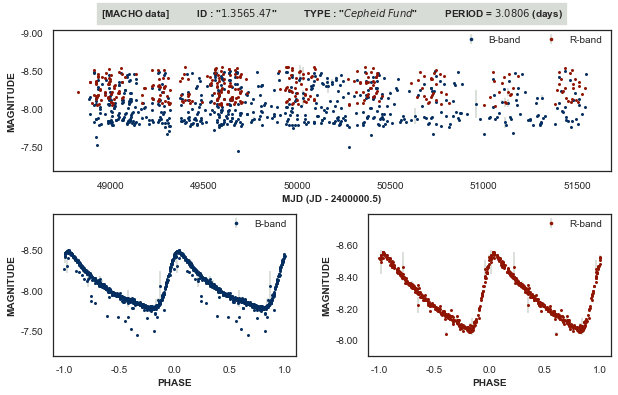

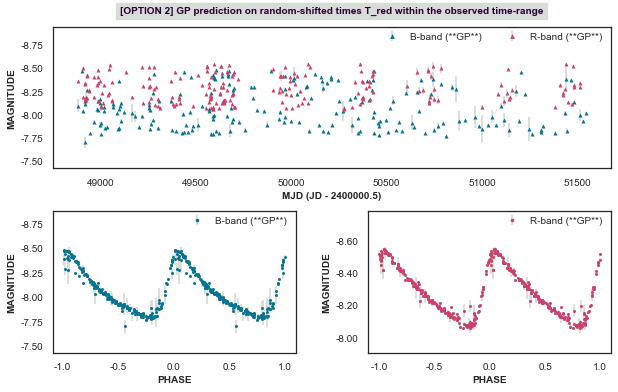

In [12]:
mr='.'; ms=6
j=0; nli=2; ncol=2

plt.close('all')
## --------------------------------------------------------------------------------------------- ##
## --------------------------------------------------------------------------------------------- ##
## ------------------------ OBSERVED LIGHT_CURVES (R- & B- bands, MACHO) ----------------------- ##
## --------------------------------------------------------------------------------------------- ##
## --------------------------------------------------------------------------------------------- ##
j+=1; plt.figure(num=j+1, figsize=(m_width, m_height*nli))
plt.subplots_adjust(wspace=.3, hspace=.3)
G=gridspec.GridSpec(nli,ncol) 

ax0 = plt.subplot(G[0,:2])
plt.errorbar(lc_b.times,
             lc_b.measurements, 
             lc_b.errors, 
             None, mr,
             color=color_blue, 
             ecolor=color_gray,
             markersize=ms, label='B-band')
plt.errorbar(lc_r.times,
             lc_r.measurements, 
             lc_r.errors, 
             None, mr,
             color=color_red, 
             ecolor=color_gray,
             markersize=ms, label='R-band')
plt.gca().invert_yaxis()
ymin,ymax = plt.gca().get_ylim(); vari=(ymax-ymin)/3; plt.ylim(ymin-vari/2,ymax+vari)
yticklabels = [l for l in plt.gca().get_yticks() if l is not '']
plt.gca().set_yticklabels(["%.2f" % member for member in yticklabels])    
plt.gca().tick_params(labelsize=m_size, pad=10)
plt.xlabel('MJD (JD - 2400000.5)', fontsize=m_size, fontweight='bold')
plt.ylabel('MAGNITUDE', fontsize=m_size, fontweight='bold')
plt.legend(ncol=2, loc='upper right', shadow=False, frameon=False, 
           bbox_to_anchor=(1,1.025), fontsize=m_size, markerscale=1.2)

emp = ' '*10; m_period = metadata['period_'][idlc]
nm = metadata['names_lc'][idlc]; lb = metadata['Y_label'][idlc].replace('_','\;')
mtitre = f'[MACHO data]{emp}ID : "${nm}$"{emp}TYPE : "${lb}$"{emp}PERIOD = ${mformat_f4%m_period}$ (days)'
plt.title(mtitre, fontsize=m_size, fontweight='bold', backgroundcolor=color_gray, 
          position=(0.5, 1.05))

## ##################### PHASE-FOLDED LIGHT_CURVES ##################### ##
ax2 = plt.subplot(G[1,0])
plt.errorbar(lc_b_fold.times,
             lc_b_fold.measurements, 
             lc_b_fold.errors, 
             None, mr,
             color=color_blue, 
             ecolor=color_gray,
             markersize=ms, label='B-band')
plt.gca().invert_yaxis()
ymin,ymax = plt.gca().get_ylim(); vari=(ymax-ymin)/3; plt.ylim(ymin-vari/2,ymax+vari)
yticklabels = [l for l in plt.gca().get_yticks() if l is not '']
plt.gca().set_yticklabels(["%.2f" % member for member in yticklabels])    
plt.gca().tick_params(labelsize=m_size, pad=10)
plt.xlabel('PHASE', fontsize=m_size, fontweight='bold')
plt.ylabel('MAGNITUDE', fontsize=m_size, fontweight='bold')
plt.legend(ncol=2, loc='upper right', shadow=False, frameon=False, 
           bbox_to_anchor=(1,1.025), fontsize=m_size, markerscale=1.2)
## ------------------------------ ##
ax3 = plt.subplot(G[1,1])
plt.errorbar(lc_r_fold.times,
             lc_r_fold.measurements, 
             lc_r_fold.errors, 
             None, mr,
             color=color_red, 
             ecolor=color_gray,
             markersize=ms, label='R-band')
plt.gca().invert_yaxis()
ymin,ymax = plt.gca().get_ylim(); vari=(ymax-ymin)/3; plt.ylim(ymin-vari/2,ymax+vari)
yticklabels = [l for l in plt.gca().get_yticks() if l is not '']
plt.gca().set_yticklabels(["%.2f" % member for member in yticklabels])    
plt.gca().tick_params(labelsize=m_size, pad=10)
plt.xlabel('PHASE', fontsize=m_size, fontweight='bold')
plt.ylabel('MAGNITUDE', fontsize=m_size, fontweight='bold')
plt.legend(ncol=2, loc='upper right', shadow=False, frameon=False, 
           bbox_to_anchor=(1,1.025), fontsize=m_size, markerscale=1.2)




## --------------------------------------------------------------------------------------------- ##
## --------------------------------------------------------------------------------------------- ##
## ------------------------------ 2) GP PREDS - on shifted time-range ----------------------------- ##
## --------------------------------------------------------------------------------------------- ##
## --------------------------------------------------------------------------------------------- ##
j+=1; plt.figure(num=j+1, figsize=(m_width, m_height*nli))
plt.subplots_adjust(wspace=.3, hspace=.3)
G=gridspec.GridSpec(nli,ncol) 

ax1_ = plt.subplot(G[0,:2])
plt.errorbar(lc_b_GP_2.times,
             lc_b_GP_2.measurements, 
             lc_b_GP_2.errors, 
             None, '^',
             color=color_seabl, 
             ecolor=color_gray,
             markersize=ms-2, label='B-band (**GP**)')
plt.errorbar(lc_r_GP_2.times,
             lc_r_GP_2.measurements, 
             lc_r_GP_2.errors, 
             None, '^',
             color=color_pink,
             ecolor=color_gray,
             markersize=ms-2, label='R-band (**GP**)')
plt.gca().invert_yaxis()
ymin,ymax = plt.gca().get_ylim(); vari=(ymax-ymin)/3; plt.ylim(ymin-vari/2,ymax+vari)
yticklabels = [l for l in plt.gca().get_yticks() if l is not '']
plt.gca().set_yticklabels(["%.2f" % member for member in yticklabels])    
plt.gca().tick_params(labelsize=m_size, pad=10)
plt.xlabel('MJD (JD - 2400000.5)', fontsize=m_size, fontweight='bold')
plt.ylabel('MAGNITUDE', fontsize=m_size, fontweight='bold')
plt.legend(ncol=2, loc='upper right', shadow=False, frameon=False, 
           bbox_to_anchor=(1,1.025), fontsize=m_size, markerscale=1.2)

emp = ' '*10; m_period = metadata['period_'][idlc]
nm = metadata['names_lc'][idlc]; lb = metadata['Y_label'][idlc].replace('_','\;')
mtitre = f'[OPTION 2] GP prediction on random-shifted times T_red within the observed time-range'
plt.title(mtitre, fontsize=m_size, fontweight='bold', backgroundcolor=color_gray,
          color ='#2a0134', position=(0.5, 1.05))

## ##################### PHASE-FOLDED LIGHT_CURVES ##################### ##
ax2 = plt.subplot(G[1,0])
plt.errorbar(lc_b_GP_2_fold.times,
             lc_b_GP_2_fold.measurements, 
             lc_b_GP_2_fold.errors, 
             None, mr,
             color=color_seabl, 
             ecolor=color_gray,
             markersize=ms, label='B-band (**GP**)')
plt.gca().invert_yaxis()
ymin,ymax = plt.gca().get_ylim(); vari=(ymax-ymin)/3; plt.ylim(ymin-vari/2,ymax+vari)
yticklabels = [l for l in plt.gca().get_yticks() if l is not '']
plt.gca().set_yticklabels(["%.2f" % member for member in yticklabels])    
plt.gca().tick_params(labelsize=m_size, pad=10)
plt.xlabel('PHASE', fontsize=m_size, fontweight='bold')
plt.ylabel('MAGNITUDE', fontsize=m_size, fontweight='bold')
plt.legend(ncol=2, loc='upper right', shadow=False, frameon=False, 
           bbox_to_anchor=(1,1.025), fontsize=m_size, markerscale=1.2)
## ------------------------------ ##
ax3 = plt.subplot(G[1,1])
plt.errorbar(lc_r_GP_2_fold.times,
             lc_r_GP_2_fold.measurements, 
             lc_r_GP_2_fold.errors, 
             None, mr,
             color=color_pink, 
             ecolor=color_gray,
             markersize=ms, label='R-band (**GP**)')
plt.gca().invert_yaxis()
ymin,ymax = plt.gca().get_ylim(); vari=(ymax-ymin)/3; plt.ylim(ymin-vari/2,ymax+vari)
yticklabels = [l for l in plt.gca().get_yticks() if l is not '']
plt.gca().set_yticklabels(["%.2f" % member for member in yticklabels])    
plt.gca().tick_params(labelsize=m_size, pad=10)
plt.xlabel('PHASE', fontsize=m_size, fontweight='bold')
plt.ylabel('MAGNITUDE', fontsize=m_size, fontweight='bold')
plt.legend(ncol=2, loc='upper right', shadow=False, frameon=False, 
           bbox_to_anchor=(1,1.025), fontsize=m_size, markerscale=1.2)

